In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import keras

print(f'Python : {sys.version}')
print(f'Pandas : {pd.__version__}')
print(f'Numpy : {np.__version__}')
print(f'Sklearn : {sklearn.__version__}')
print(f'Keras : {keras.__version__}')

Python : 3.9.10 (main, Jan 15 2022, 11:48:04) 
[Clang 13.0.0 (clang-1300.0.29.3)]
Pandas : 1.3.5
Numpy : 1.21.5
Sklearn : 1.0.2
Keras : 2.7.0


In [2]:
names = ['n_pregnant', 'glucose_concentration', 'blood_pressure (mm Hg)', 'skin_thickness (mm)',
         'serum_insulin (mu U/ml)', 'BMI', 'pedigree_function', 'age', 'class']

df = pd.read_csv("../datasets/pima_indian/Pima Indians Diabetes Database.csv")

df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure (mm Hg),768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skin fold thickness (mm),768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2-Hour serum insulin (mu U/ml),768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index (weight in kg/(height in m)^2),768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age (years),768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class variable (0 or 1),768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
         'Age', 'Outcome']

df.columns = names

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
# Preprocess the data, mark zero values as NaN and Drop

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    df[col].replace(0, np.NaN, inplace=True)
    
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df.dropna(inplace=True)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


In [10]:
# Convert df to numpy array

dataset = df.values

print(dataset.shape)

(392, 9)


In [11]:
X = dataset[:, 0:8]
y = dataset[:, 8].astype(int)

In [13]:
print(X.shape)
print(y.shape)

print(y[:5])

(392, 8)
(392,)
[0 1 1 1 1]


In [14]:
# Normalize the data using sklearn StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [15]:
data = pd.DataFrame(X_standardized)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,392.0,-9.063045e-18,1.001278,-1.029213,-0.717427,-0.405640,0.529718,4.271153
1,392.0,1.132881e-17,1.001278,-2.161731,-0.766596,-0.117696,0.660984,2.445459
2,392.0,-4.531523e-16,1.001278,-3.739001,-0.694164,-0.053146,0.587873,3.151946
3,392.0,1.087565e-16,1.001278,-2.108484,-0.775531,-0.013844,0.747843,3.223325
4,392.0,1.064908e-16,1.001278,-1.196867,-0.668179,-0.257445,0.285988,5.812990
5,392.0,1.631348e-16,1.001278,-2.120941,-0.667678,0.016210,0.571870,4.846172
6,392.0,1.812609e-17,1.001278,-1.269525,-0.734091,-0.213147,0.475164,5.497667
7,392.0,1.110223e-16,1.001278,-0.968299,-0.771985,-0.379357,0.504056,4.921123


In [24]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [25]:
seed = 6
np.random.seed(seed)

def create_model():
    
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(learning_rate=0.01)
    model.compile(loss = 'binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [26]:
model = KerasClassifier(build_fn=create_model, verbose=1)

batch_size=[16, 32, 64 ,128]
epochs=[4, 10, 15]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator = model, param_grid=param_grid, cv = KFold(random_state=6, shuffle=True), verbose=10)
grid_results = grid.fit(X_standardized, y)

print(f'Best : {grid_results.best_score_}, using {grid_results.best_params_}')

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f'{mean}, {stdev} with {param} ')

/var/folders/v1/mhc8zqfd0zj8p68nr82txff80000gn/T/ipykernel_3405/287117419.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=1)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=16, epochs=4....................................
Epoch 1/4
20/20 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6709
Epoch 2/4
20/20 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.6805
Epoch 3/4
20/20 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.6837
Epoch 4/4
5/5 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.7975
[CV 1/5; 1/12] END .....batch_size=16, epochs=4;, score=0.797 total time=   0.9s
[CV 2/5; 1/12] START batch_size=16, epochs=4....................................
Epoch 1/4
20/20 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6454
Epoch 2/4
20/20 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.6709
Epoch 3/4
20/20 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.6709
Epoch 4/4
5/5 [====

In [28]:
best_batch_size=64
best_epochs=15

In [27]:
# grid search for learning rate and dropout rate
from keras.layers import Dropout

def create_model(learn_rate, dropout_rate):
    
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, input_dim=16, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(learning_rate=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [30]:
model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batch_size, verbose=1)

learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.2, 0.4, 0.6]

param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=KFold(random_state=seed, shuffle=True), verbose=10)
grid_results = grid.fit(X_standardized, y)

print(f'Best : {grid_results.best_score_}, using{grid_results.best_params_}')

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f'{mean}, ({stdev}) with : {param}')

/var/folders/v1/mhc8zqfd0zj8p68nr82txff80000gn/T/ipykernel_3405/1660367187.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batch_size, verbose=1)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START dropout_rate=0.0, learn_rate=0.001.........................
Epoch 1/15
5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.6134
Epoch 2/15
5/5 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6805
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.6805
Epoch 4/15
5/5 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6805
Epoch 5/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6805
Epoch 6/15
5/5 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.6805
Epoch 7/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.6805
Epoch 8/15
5/5 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.6805
Epoch 9/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0

In [31]:
best_dropout_rate=0.0
best_learn_rate = 0.01

In [32]:
def create_model(activation, init):
    
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer=init, activation=activation))
    model.add(Dense(16, input_dim=8, kernel_initializer=init, activation=activation))
    model.add(Dense(8, input_dim=8, kernel_initializer=init, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(learning_rate=best_learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [34]:
model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batch_size, verbose=1)

activation=['softmax', 'relu', 'tanh', 'linear']
init=['uniform', 'normal', 'zero']

param_grid = dict(activation=activation, init=init)

grid = GridSearchCV(estimator=model, param_grid = param_grid, cv=KFold(random_state=seed, shuffle=True), verbose=10)
grid_results = grid.fit(X_standardized, y)

print(f'Best : {grid_results.best_score_}, using {grid_results.best_params_}')

means=grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_resuls_['std_test_score']
params=grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f'{mean}, ({stdev}) with : {param}')

/var/folders/v1/mhc8zqfd0zj8p68nr82txff80000gn/T/ipykernel_3405/3608229464.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batch_size, verbose=1)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation=softmax, init=uniform...........................
Epoch 1/15
5/5 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.3195
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.5783
Epoch 3/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.6805
Epoch 4/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6805
Epoch 5/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6805
Epoch 6/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.6805
Epoch 7/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6805
Epoch 8/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6805
Epoch 9/15
5/5 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0

AttributeError: 'GridSearchCV' object has no attribute 'cv_resuls_'

In [35]:
print(f'Best : {grid_results.best_score_}, using {grid_results.best_params_}')

means=grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f'{mean}, ({stdev}) with : {param}')

Best : 0.7859136581420898, using {'activation': 'linear', 'init': 'normal'}
0.6685167193412781, (0.027157343185035612) with : {'activation': 'softmax', 'init': 'uniform'}
0.6685167193412781, (0.027157343185035612) with : {'activation': 'softmax', 'init': 'normal'}
0.6685167193412781, (0.027157343185035612) with : {'activation': 'softmax', 'init': 'zero'}
0.7398247241973877, (0.038819633993548465) with : {'activation': 'relu', 'init': 'uniform'}
0.7526777029037476, (0.04914818095970763) with : {'activation': 'relu', 'init': 'normal'}
0.6685167193412781, (0.027157343185035612) with : {'activation': 'relu', 'init': 'zero'}
0.7833171010017395, (0.03930211243483301) with : {'activation': 'tanh', 'init': 'uniform'}
0.7755923390388488, (0.04610566113400644) with : {'activation': 'tanh', 'init': 'normal'}
0.6685167193412781, (0.027157343185035612) with : {'activation': 'tanh', 'init': 'zero'}
0.7807205438613891, (0.030707709756635553) with : {'activation': 'linear', 'init': 'uniform'}
0.785913

In [36]:
best_activation = 'relu'
best_init = 'normal'

In [37]:
def create_model(neuron1, neuron2, neuron3):
    
    model = Sequential()
    model.add(Dense(neuron1, input_dim=8, kernel_initializer=best_init, activation=best_activation))
    model.add(Dense(neuron2, input_dim=8, kernel_initializer=best_init, activation=best_activation))
    model.add(Dense(neuron3, input_dim=8, kernel_initializer=best_init, activation=best_activation))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(learning_rate=best_learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [38]:
model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batch_size, verbose=0)

neuron1 = [8, 16, 32]
neuron2 = [16, 32, 64]
neuron3 = [8, 16, 32]

param_grid = dict(neuron1=neuron1, neuron2=neuron2, neuron3=neuron3)

grid = GridSearchCV(estimator=model, param_grid = param_grid, cv=KFold(random_state=seed, shuffle=True),
                    refit=True, verbose=10)
grid_results = grid.fit(X_standardized, y)

print(f'Best : {grid_results.best_score_}, using {grid_results.best_params_}')

means=grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f'{mean}, ({stdev}) with : {param}')

/var/folders/v1/mhc8zqfd0zj8p68nr82txff80000gn/T/ipykernel_3405/1419069235.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batch_size, verbose=0)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=8, neuron2=16, neuron3=8...........................
[CV 1/5; 1/27] END neuron1=8, neuron2=16, neuron3=8;, score=0.848 total time=   0.8s
[CV 2/5; 1/27] START neuron1=8, neuron2=16, neuron3=8...........................
[CV 2/5; 1/27] END neuron1=8, neuron2=16, neuron3=8;, score=0.709 total time=   0.7s
[CV 3/5; 1/27] START neuron1=8, neuron2=16, neuron3=8...........................
[CV 3/5; 1/27] END neuron1=8, neuron2=16, neuron3=8;, score=0.718 total time=   0.9s
[CV 4/5; 1/27] START neuron1=8, neuron2=16, neuron3=8...........................
[CV 4/5; 1/27] END neuron1=8, neuron2=16, neuron3=8;, score=0.808 total time=   0.6s
[CV 5/5; 1/27] START neuron1=8, neuron2=16, neuron3=8...........................
[CV 5/5; 1/27] END neuron1=8, neuron2=16, neuron3=8;, score=0.795 total time=   0.8s
[CV 1/5; 2/27] START neuron1=8, neuron2=16, neuron3=16..........................
[CV 1/5; 2/27] END neuron1=

In [39]:
best_neuron1 = 32
best_neuron2 = 16
best_neuron3 = 16

In [41]:
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Dense(best_neuron1, input_dim=8, kernel_initializer=best_init, activation=best_activation))
model.add(Dense(best_neuron2, input_dim=8, kernel_initializer=best_init, activation=best_activation))
model.add(Dense(best_neuron3, input_dim=8, kernel_initializer=best_init, activation=best_activation))
model.add(Dense(1, activation='sigmoid'))

adam=Adam(learning_rate=best_learn_rate)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
ckpt_model = 'pima-weights-best-t.hdf5'

checkpoint = ModelCheckpoint(ckpt_model,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks_list = [checkpoint]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=best_epochs, batch_size=best_batch_size, callbacks=callbacks_list,
                    verbose=1)

(313, 8)
(79, 8)
Epoch 1/15
5/5 [==============================] - 1s 33ms/step - loss: 0.6979 - accuracy: 0.6645 - val_loss: 0.6748 - val_accuracy: 0.6835
Epoch 2/15
5/5 [==============================] - 0s 8ms/step - loss: 0.6655 - accuracy: 0.6645 - val_loss: 0.6206 - val_accuracy: 0.6835
Epoch 3/15
5/5 [==============================] - 0s 11ms/step - loss: 0.6374 - accuracy: 0.6645 - val_loss: 0.6068 - val_accuracy: 0.6835
Epoch 4/15
5/5 [==============================] - 0s 8ms/step - loss: 0.6293 - accuracy: 0.6645 - val_loss: 0.5968 - val_accuracy: 0.6835
Epoch 5/15
5/5 [==============================] - 0s 9ms/step - loss: 0.6250 - accuracy: 0.6645 - val_loss: 0.6079 - val_accuracy: 0.6835
Epoch 6/15
5/5 [==============================] - 0s 15ms/step - loss: 0.6110 - accuracy: 0.6645 - val_loss: 0.5652 - val_accuracy: 0.6835
Epoch 7/15
5/5 [==============================] - 0s 9ms/step - loss: 0.6096 - accuracy: 0.6645 - val_loss: 0.5785 - val_accuracy: 0.6835
Epoch 8/15
5/5

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

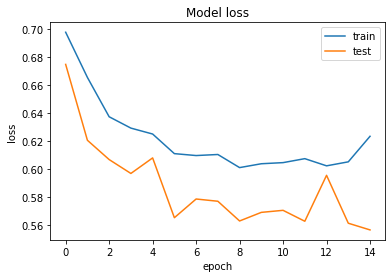

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

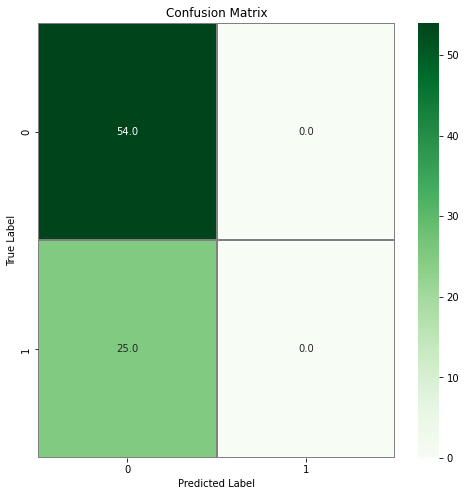

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

confusion_mtx = confusion_matrix(y_test, y_final)

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap='Greens', linecolor='gray', fmt='.1f', ax=ax)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()